In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy

sns.set_theme(color_codes=True)


In [2]:
# Función que recolecta los dataframes

def sacarDF(grado, año):
    
    # Diccionario a retornar
    gradoPorAño = {}
    
    # Dirección de los datos
    path = "./Data/"
    
    if año == '2019':
        
        path = path + "2019 9-10AyB-11.xlsx"
        
        # Agrega al diccionario cada df por bimestre
        for i in range(1,5):
            gradoPorAño[f'BIM {i}'] = pd.read_excel(path, sheet_name= grado+' '+año+f" BIM {i}")
                    
        gradoPorAño['NF'] = pd.read_excel(path, sheet_name= grado+' '+año+" NOTA FINAL")
    
    if año == '2020':
        
        path = path + "2020 9AyB-10-11.xlsx"
            
        for i in range(1,5):
            gradoPorAño[f'BIM {i}'] = pd.read_excel(path, sheet_name= grado+' '+año+f" BIM {i}")
                    
        gradoPorAño['NF'] = pd.read_excel(path, sheet_name= grado+' '+año+" NOTA FINAL")
    
    # Devuelve el dataframe
    return gradoPorAño

# 2019 -- 10A y 10B
# 2020 -- 9A y 9B
#noveno2019 = sacarDF('9', '2019')
#decimoA2019 = sacarDF('10A', '2019')
#decimoB2019 = sacarDF('10B', '2019')
#once2019 = sacarDF('11', '2019')

#novenoA2020 = sacarDF('9A', '2020')
#novenoB2020 = sacarDF('9B', '2020')
#decimo2020 = sacarDF('10', '2020')
#once2020 = sacarDF('11','2020')

In [3]:
noveno2019 = sacarDF('9', '2019')
decimoA2019 = sacarDF('10A', '2019')
decimoB2019 = sacarDF('10B', '2019')
once2019 = sacarDF('11', '2019')

novenoA2020 = sacarDF('9A', '2020')
novenoB2020 = sacarDF('9B', '2020')
decimo2020 = sacarDF('10', '2020')
once2020 = sacarDF('11','2020')
# ===================================================================

# Función para limpiar los datos

def preProcesamiento(dataframe):
    
    # Mira la cantidad de columnas para ver si es de grado 9 o 10 y 11
    if(len(dataframe.columns) == 29):
        
        # Cambiar las columnas por numero 0 - 31
        dataframe.columns = range(29)
        
        # Elimina la columna con np.nan
        dataframe.drop([0], axis=1, inplace=True)
        
        # Actualiza los numeros de las columnas 0 - 30
        dataframe.columns = range(28)
        
        # Incluye áreas, perdidas, comportamiento, len = 31
        materiasDeciOnce = dataframe.iloc[0].tolist()
        
        
        # Crea el array con los indices a borrar
        indexABorrar = []
        
        for materia in materiasDeciOnce:
            
            indexActual = materiasDeciOnce.index(materia)
            
            if materia.find("{A}") != -1:
                indexABorrar.append(indexActual)
                
            
            elif materia.find("AREA") != -1:
                
                indexABorrar.append(indexActual)
               
                
            elif materia.find("Disc") != -1:
                indexABorrar.append(indexActual)
                
            
            elif materia.find("Prom") != -1:
                indexABorrar.append(indexActual)
                
                
            elif materia.find("ASIG") != -1:
                indexABorrar.append(indexActual)
        
        # Elimina las columnas (En número) 
        dataframe.drop(indexABorrar, axis=1,inplace=True)
        
        # Vuelve a leer las materias sin áreas, disc, prom. len = 17
        materiasNoveno = dataframe.iloc[0].tolist()
        
        # Resetea las columnas num -> materia
        dataframe.columns = materiasNoveno 
        
        
        # Cambia el nombre de las columnas por números
        #dataframe.columns = range(29)

        # Elimina las columnas no interesantes como las áreas o áreas perdidas etc
        #dataframe.drop([0,2,3,7,9,10,11,13,17,22,24,26,27,28], axis=1,inplace=True)
        
        dataframe.rename(columns={'BIOLOGÍA':'BIOLOGIA',
                                 'CIENCIAS SOCIALES':'SOCIALES',
                                 'EDU.  FÍSICA RECREACION Y DEPORTES':'EDU FISICA',
                                 'EDUCACIÓN ÉTICA':'ETICA',
                                 'FÍSICA':'FISICA',
                                 'LECTORES COMPETENTES':'LEC COMPETENTES',
                                 'MATEMÁTICAS':'MATEMATICAS',
                                 'QUÍMICA':'QUIMICA',
                                 'RELIGIÓN':'RELIGION',
                                 'Comportamiento':'COMPORTAMIENTO',
                                 'FILOSOFÍA':'FILOSOFIA',
                                 'TECNOLOGÍA E INFORMATICA':'TECNOLOGIA',
                                 'TECNOLOGIA E INFORMATICA':'TECNOLOGIA'},
                        inplace=True)

        # Elimina la fila donde estaban los nombres de las materias
        dataframe.drop([0], axis=0,inplace=True)
        
    elif(len(dataframe.columns) == 32):
        
        # Cambiar las columnas por numero 0 - 31
        dataframe.columns = range(32)
        
        # Elimina la columna con np.nan
        dataframe.drop([0], axis=1, inplace=True)
        
        # Actualiza los numeros de las columnas 0 - 30
        dataframe.columns = range(31)
        
        # Incluye áreas, perdidas, comportamiento, len = 31
        materiasDeciOnce = dataframe.iloc[0].tolist()
        
        
        # Crea el array con los indices a borrar
        indexABorrar = []
        
        for materia in materiasDeciOnce:
            
            indexActual = materiasDeciOnce.index(materia)
            
            if materia.find("{A}") != -1:
                indexABorrar.append(indexActual)
                
            
            elif materia.find("AREA") != -1:
                
                indexABorrar.append(indexActual)
               
                
            elif materia.find("Disc") != -1:
                indexABorrar.append(indexActual)
                
            
            elif materia.find("Prom") != -1:
                indexABorrar.append(indexActual)
                
                
            elif materia.find("ASIG") != -1:
                indexABorrar.append(indexActual)
        
        # Elimina las columnas (En número) 
        dataframe.drop(indexABorrar, axis=1,inplace=True)
        
        # Vuelve a leer las materias sin áreas, disc, prom. len = 17
        materiasDeciOnce = dataframe.iloc[0].tolist()
        
        # Resetea las columnas num -> materia
        dataframe.columns = materiasDeciOnce        
        
        # Cambia el nombre de las columnas por números
        #dataframe.columns = range(32)

        # Elimina las columnas no interesantes como las áreas o áreas perdidas etc
        #dataframe.drop([0,3,4,9,10,11,12,13,16,21,26,27,29,30,31], axis=1,inplace=True)
        
        dataframe.rename(columns={'CIEN. POLÍTICAS':'POLITICAS',
                                 'CIENCIAS POLITICAS':'POLITICAS',
                                 'BIOLOGÍA':'BIOLOGIA',
                                 'CIENCIAS SOCIALES':'SOCIALES',
                                 'EDUCACIÓN  FÍSICA':'EDU FISICA',
                                 'EDU.  FÍSICA RECREACION Y DEPORTES':'EDU FISICA',
                                 'EDUCACIÓN ÉTICA':'ETICA',
                                 'EDUCACION ÉTICA':'ETICA',
                                 'MÚSICA':'MUSICA',
                                 'INGLÉS':'INGLES',
                                 'EDU. ÉTICA':'ETICA',
                                 'FÍSICA':'FISICA',
                                 'LECTORES COMPETENTES':'LEC COMPETENTES',
                                 'MATEMÁTICAS':'MATEMATICAS',
                                 'QUÍMICA':'QUIMICA',
                                 'RELIGIÓN':'RELIGION',
                                 'Comportamiento':'COMPORTAMIENTO',
                                 'FILOSOFÍA':'FILOSOFIA',
                                 'TECNOLOGÍA E INFORMATICA':'TECNOLOGIA',
                                 'TECNOLOGIA E INFORMATICA':'TECNOLOGIA'},
                        inplace=True)

        # Elimina la fila donde estaban los nombres de las materias
        dataframe.drop([0], axis=0,inplace=True)
        
        
    else:
        return 'Hay un error con la cantidad de columnas del df.'
    
    # Cambiar el tipo de dato del df
    
    dataframe = dataframe.astype('float') 
    
    
    # Lidiando con datos faltantes
    
    for columna in dataframe.columns.tolist():
        
        # Si hace falta un dato en una columna
        if(True in dataframe[columna].isin([np.nan]).tolist()):
            
            # Si hay otros datos en la columna, cambia el NaN por el mean
            if(False in dataframe[columna].isin([np.nan]).tolist()):
                
                meanColumna = dataframe[columna].mean()
                dataframe[columna].replace(np.nan, meanColumna, inplace=True)
            
            # Si esta vacia la columna, pone la nota de 8.228
            else:
                dataframe[columna].replace(np.nan, 8.22875, inplace=True)
    
    return dataframe

#novenoB2020['BIM 1'] = preProcesamiento(novenoB2020['BIM 1'])

# PreProcesa y remplaza los datos faltantes de cada gradoXaño (Falta NF)
for i in range(1,5):
    noveno2019[f'BIM {i}'] = preProcesamiento(noveno2019[f'BIM {i}'])
    decimoA2019[f'BIM {i}'] = preProcesamiento(decimoA2019[f'BIM {i}'])
    decimoB2019[f'BIM {i}'] = preProcesamiento(decimoB2019[f'BIM {i}'])
    once2019[f'BIM {i}'] = preProcesamiento(once2019[f'BIM {i}'])

    novenoA2020[f'BIM {i}'] = preProcesamiento(novenoA2020[f'BIM {i}'])
    novenoB2020[f'BIM {i}'] = preProcesamiento(novenoB2020[f'BIM {i}'])
    decimo2020[f'BIM {i}'] = preProcesamiento(decimo2020[f'BIM {i}'])
    once2020[f'BIM {i}'] = preProcesamiento(once2020[f'BIM {i}'])

In [4]:

# Agrupación de los datos
#noveno2019['BIM 4'].describe()

mergeNoveno2019 = pd.concat(objs=[noveno2019['BIM 1'], noveno2019['BIM 2'], noveno2019['BIM 3'], noveno2019['BIM 4']])
mergeDecimoA2019 = pd.concat(objs=[decimoA2019['BIM 1'],decimoA2019['BIM 2'],decimoA2019['BIM 3'],decimoA2019['BIM 4']])
mergeDecimoB2019 = pd.concat(objs=[decimoB2019['BIM 1'],decimoB2019['BIM 2'],decimoB2019['BIM 3'],decimoB2019['BIM 4']])
mergeOnce2019 = pd.concat(objs=[once2019['BIM 1'],once2019['BIM 2'],once2019['BIM 3'],once2019['BIM 4']])

mergeTodos2019 = pd.concat(objs=[mergeNoveno2019, mergeDecimoA2019, mergeDecimoB2019, mergeOnce2019])

# =========================================================
mergeNovenoA2020 = pd.concat(objs=[novenoA2020['BIM 1'], novenoA2020['BIM 2'], novenoA2020['BIM 3'], novenoA2020['BIM 4']])
mergeNovenoB2020 = pd.concat(objs=[novenoB2020['BIM 1'], novenoB2020['BIM 2'], novenoB2020['BIM 3'], novenoB2020['BIM 4']])
mergeDecimo2020 = pd.concat(objs=[decimo2020['BIM 1'],decimo2020['BIM 2'],decimo2020['BIM 3'],decimo2020['BIM 4']])
mergeOnce2020 = pd.concat(objs=[once2020['BIM 1'],once2020['BIM 2'],once2020['BIM 3'],once2020['BIM 4']]) 

mergeTodos2020 = pd.concat(objs=[mergeNovenoA2020, mergeNovenoB2020, mergeDecimo2020, mergeOnce2020])

merge19y20 = pd.concat(objs=[mergeTodos2019, mergeTodos2020])
#merge19y20.describe().to_excel('2019y2020Resumen.xlsx')
merge19y20.describe()


,BIOLOGIA,SOCIALES,DANZA,EDU FISICA,ETICA,FISICA,INGLES,LEC COMPETENTES,LENGUAJE,MATEMATICAS,MUSICA,QUIMICA,RELIGION,TECNOLOGIA,COMPORTAMIENTO,POLITICAS,FILOSOFIA
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,462.00000,462.000000
mean,8.199719,8.192275,9.254635,9.065871,8.617556,8.437079,8.321436,8.076404,8.019928,8.023462,8.972893,8.309551,8.915169,8.387640,9.305056,8.31342,8.537662
std,0.718355,0.806119,0.516322,0.660265,0.672475,0.760044,0.660607,0.816844,0.847629,0.835297,0.490596,0.898753,0.700649,0.579989,1.019309,0.71673,0.692233
min,4.200000,5.800000,7.000000,5.000000,5.700000,7.000000,7.000000,4.500000,4.500000,4.500000,7.000000,4.000000,7.000000,5.800000,0.000000,6.00000,3.700000
25%,7.700000,7.700000,9.000000,8.800000,8.200000,7.900000,7.900000,7.400000,7.400000,7.400000,9.000000,7.800000,8.500000,8.000000,8.900000,7.90000,8.200000
50%,8.100000,8.100000,9.200000,9.100000,8.700000,8.400000,8.228750,8.000000,8.000000,8.000000,9.100000,8.300000,9.100000,8.400000,10.000000,8.30000,8.600000
75%,8.800000,8.800000,9.700000,9.500000,9.100000,9.000000,8.700000,8.725000,8.700000,8.600000,9.200000,8.900000,9.500000,8.800000,10.000000,8.90000,9.000000
max,9.800000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,9.800000


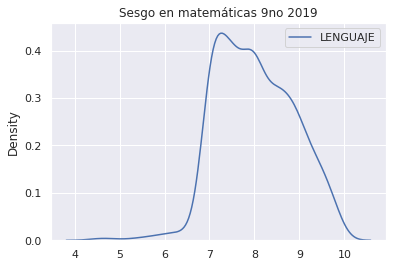

In [5]:
#merge19y20['LEC COMPETENTES'].plot.density(title='', xlabel='Notas', ylabel='Densidad')
sns.kdeplot(data=[merge19y20['LENGUAJE']])
plt.title('Sesgo en matemáticas 9no 2019')
plt.show()

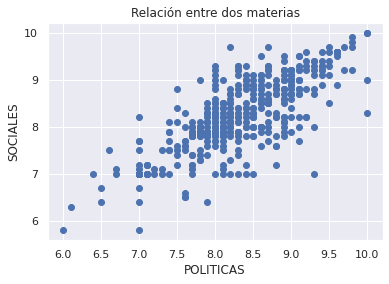

In [6]:
xAxis = 'POLITICAS'
yAxis = 'SOCIALES'
plt.scatter(x=merge19y20[xAxis],y=merge19y20[yAxis])
plt.xlabel(xAxis)
plt.ylabel(yAxis)
plt.title('Relación entre dos materias')
plt.show()

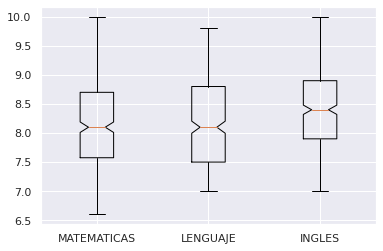

In [7]:
plt.boxplot([mergeTodos2020['MATEMATICAS'], mergeTodos2020['LENGUAJE'], mergeTodos2020['INGLES'] ],
            notch=True, labels=['MATEMATICAS','LENGUAJE', 'INGLES'])
plt.show()

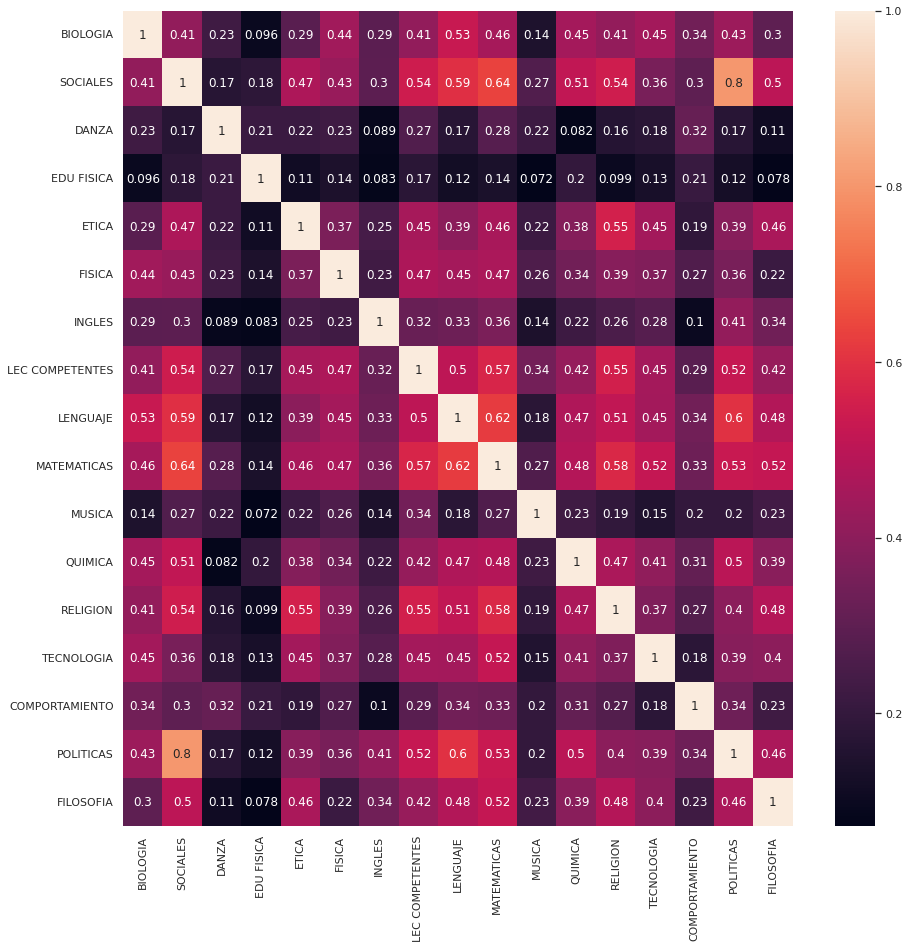

In [8]:
corr_df = mergeTodos2019.corr(method='pearson')
plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=True)
#plt.show()
plt.savefig("CorrelacionPearsonTodas.pdf", bbox_inches='tight')

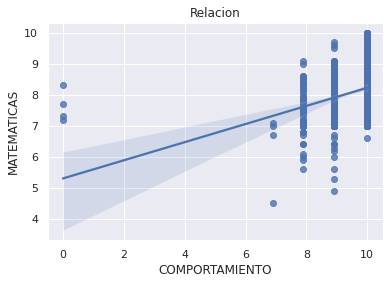

In [9]:

xAxis = 'COMPORTAMIENTO'
yAxis = 'MATEMATICAS'
sns.regplot(x=xAxis,y=yAxis,
           data=merge19y20,
           fit_reg=True,
           #aspect=1.5,
           #palette="Set2"
           color="b")
plt.title("Relacion")
plt.show()

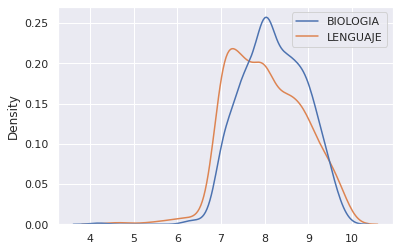

In [10]:
sns.kdeplot(data=[merge19y20['BIOLOGIA'],merge19y20['LENGUAJE']])
plt.show()

/home/qwerty/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


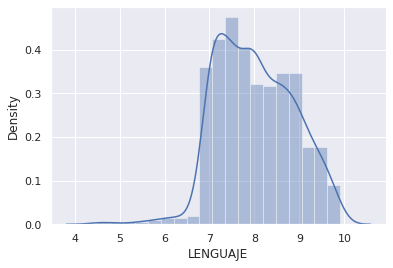

In [11]:
sns.distplot(merge19y20['LENGUAJE'])
plt.show()

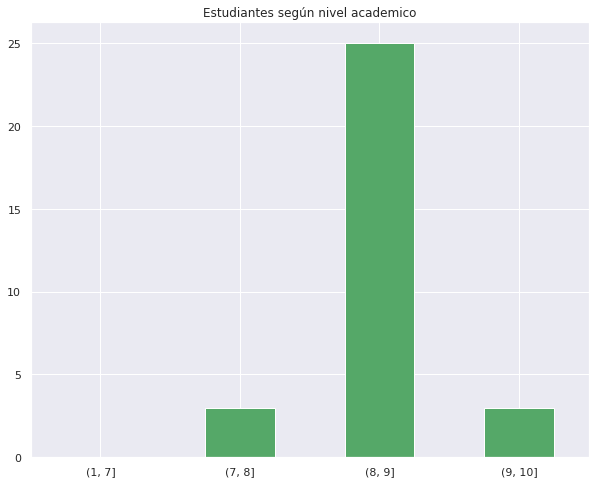

In [12]:
out = pd.cut(decimo2020['BIM 2']['MATEMATICAS'], bins=[1,7,8,9,10], include_lowest=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color='g', figsize=(10,8))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.title('Estudiantes según nivel academico')
plt.show()